In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.isna().sum()

url                               0
timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
 data_channel_is_entertainment    0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                  

In [4]:
df.iloc[:,27:34].isna().sum()

kw_avg_avg                    0
self_reference_min_shares     0
self_reference_max_shares     0
self_reference_avg_sharess    0
weekday_is_monday             0
weekday_is_tuesday            0
weekday_is_wednesday          0
dtype: int64

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# Raw Prediction Analysis Initial Version 1

In [6]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [7]:
features=['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
target=['shares']
seed=177
X=df[features]
Y=df[target]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=seed)

In [8]:
# Liner Regression()
lr=LinearRegression()
model=lr.fit(X_train, Y_train)
pred_values=model.predict(X_test)
print("mean_absolute_error = ", mean_absolute_error(Y_test, pred_values))

mean_absolute_error =  3141.5352204862465


In [ ]:
# Random Forest()
rfr = RandomForestClassifier()
model = rfr.fit(X_train, Y_train)
pred_values = model.predict(X_test)
print("mean_absolute_error = ", mean_absolute_error(Y_test, pred_values))

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# DecisionTreeClassifier model
dt=DecisionTreeClassifier()
model=dt.fit(X_train, Y_train)
pred_values=model.predict(X_test)
print("mean_absolute_error = ", mean_absolute_error(Y_test, pred_values))

mean_absolute_error =  3785.934922436625


# Final Prediction Analysis Version 2


In [8]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#### Outliers Removal

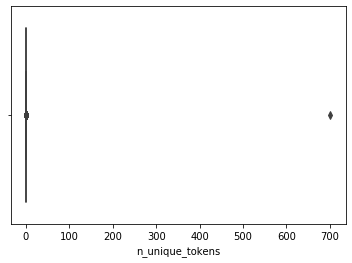

In [9]:
sns.boxplot(x='n_unique_tokens',data=df)

In [10]:
# Below 4 columns have Impacting Outliers.
# n_unique_tokens, n_non_stop_unique_tokens, n_non_stop_words, kw_max_min

# Row Index values of the Outliers are..

print(df['n_unique_tokens'].values.argmax())
print(df['n_non_stop_unique_tokens'].values.argmax())
print(df['n_non_stop_words'].values.argmax())

31037
31037
31037


In [11]:
# Deleting the rows that have outpier values
df.drop(df.index[31037], inplace=True)

In [12]:
print(df['kw_max_min'].values.argmax())

16281


In [13]:
df.drop(df.index[[16281,16294]], inplace=True)

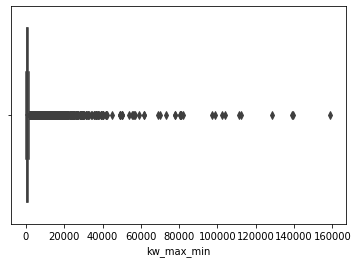

In [14]:
sns.boxplot(x='kw_max_min',data=df)

#### Standard Scaling of columns

In [15]:
features = ['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
new=df[features]

In [16]:
SS = StandardScaler()
scaled_data = SS.fit_transform(new)
df2 = pd.DataFrame(scaled_data, columns=new.columns)

In [17]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.757829,0.757435,-0.695221,0.970453,0.175235,0.925731,-0.607442,-0.335518,-0.426568,-0.304274,...,0.237264,0.063833,-0.229071,-0.708365,-0.268864,-0.969840,0.671317,-0.975502,-1.810859,0.138957
1,1.757829,-0.661673,-0.618802,0.541219,0.175235,0.773568,-0.695685,-0.594920,-0.426568,-0.304274,...,-0.640214,-0.870985,-0.229071,1.102220,1.367462,0.078666,-0.870792,-0.269124,0.837721,-0.689623
2,1.757829,-0.661673,-0.712203,0.325231,0.175235,-0.057941,-0.695685,-0.594920,-0.426568,-0.304274,...,1.358455,0.063833,0.981781,-1.621814,-0.957843,-0.270836,-0.870792,-0.269124,0.837721,-0.689623
3,1.757829,-0.661673,-0.032919,-0.195102,0.175235,-0.046455,-0.166225,-0.854321,-0.426568,-0.304274,...,0.307376,0.573734,0.174546,-0.862584,-0.268864,-0.620338,-0.870792,-0.269124,0.837721,-0.689623
4,1.757829,1.230471,1.115496,-0.837971,0.175235,-0.856309,0.716210,4.074306,1.860852,-0.304274,...,0.548097,-0.870985,0.981781,0.307972,0.075626,0.602919,0.531125,0.244605,-1.570079,-0.087019


In [19]:
target=['shares']
seed=177
X=df2[features]
Y=df[target]

In [29]:
# Linear Regression
lr=LinearRegression()
kfold = KFold(n_splits=10,random_state=seed)
cv_lr_model = cross_validate(lr,X,Y,cv=kfold,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
cv_lr_model

{'fit_time': array([0.11831546, 0.12533641, 0.16143274, 0.10828972, 0.1072886 ,
        0.11330438, 0.1123023 , 0.10327744, 0.11029696, 0.10829234]),
 'score_time': array([0.00701857, 0.00601768, 0.0070188 , 0.00702095, 0.00701928,
        0.00702   , 0.0070188 , 0.00701952, 0.00802207, 0.0070188 ]),
 'test_r2': array([-0.00355506,  0.0012259 ,  0.00898692,  0.03750536,  0.01596866,
         0.01476347,  0.03881338,  0.05049491,  0.01445175,  0.02269289]),
 'train_r2': array([0.0256352 , 0.02654327, 0.0261814 , 0.02269664, 0.02176122,
        0.02446733, 0.02278782, 0.02268067, 0.02392083, 0.0232318 ]),
 'test_neg_mean_squared_error': array([-1.40255437e+08, -1.74045512e+08, -2.30630995e+08, -6.91438123e+07,
        -3.40410224e+08, -1.65086754e+08, -4.73685035e+07, -3.38869304e+07,
        -6.81952577e+07, -6.16121765e+07]),
 'train_neg_mean_squared_error': array([-1.31223971e+08, -1.27373307e+08, -1.21083076e+08, -1.38998072e+08,
        -1.09111829e+08, -1.28356827e+08, -1.41431035e

In [30]:
df_lr = pd.DataFrame(zip(cv_lr_model['test_r2'], cv_lr_model['train_r2']), columns=['TEST', 'TRAIN'])
df_lr['Difference']=abs(df_lr['TEST']-df_lr['TRAIN'])
df_lr

,TEST,TRAIN,Difference
0,-0.003555,0.025635,0.029190
1,0.001226,0.026543,0.025317
2,0.008987,0.026181,0.017194
3,0.037505,0.022697,0.014809
4,0.015969,0.021761,0.005793
5,0.014763,0.024467,0.009704
6,0.038813,0.022788,0.016026
7,0.050495,0.022681,0.027814
8,0.014452,0.023921,0.009469
9,0.022693,0.023232,0.000539


In [31]:
print(df_lr['Difference'].mean())
print(df_lr['TEST'].mean())

0.015585503210794837
0.020134817396279724


In [32]:
# Random Forest()
rf=RandomForestClassifier(max_depth=3, n_estimators=30, random_state=seed)
cv_rf_model = cross_validate(rf,X,Y,cv=10,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
cv_rf_model

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-package

{'fit_time': array([ 8.61918926, 11.92007256, 11.34953761, 11.31243682, 11.26531005,
        11.4658525 , 11.32447076, 11.81679392, 11.71837187, 11.61124253]),
 'score_time': array([3.45128703, 4.51815844, 3.96867824, 3.61974239, 3.47134018,
        3.3229897 , 3.32193875, 3.3680625 , 3.50142145, 3.07026052]),
 'test_r2': array([-0.04665674, -0.12155015, -0.14923526, -0.17370651, -0.19686571,
        -0.21016374, -0.21915184, -0.23802733, -0.25260214, -0.36440508]),
 'train_r2': array([-0.15805655, -0.03534824, -0.03672293, -0.03730504, -0.03769948,
        -0.03798762, -0.03816396, -0.03845101, -0.03814302, -0.0386623 ]),
 'test_neg_mean_squared_error': array([-1.00241753e+09, -5.49748363e+07, -2.87505089e+07, -2.03383158e+07,
        -1.57297735e+07, -1.33425066e+07, -1.17949111e+07, -9.82584361e+06,
        -8.81906861e+06, -8.56906789e+06]),
 'train_neg_mean_squared_error': array([-1.99864161e+07, -1.51093160e+08, -1.53612357e+08, -1.54083045e+08,
        -1.54138770e+08, -1.540096

In [34]:
df_rf= pd.DataFrame(zip(cv_rf_model['test_r2'], cv_rf_model['train_r2']), columns=['TEST', 'TRAIN'])
df_rf['Difference']=abs(df_rf['TEST']-df_rf['TRAIN'])
df_rf

,TEST,TRAIN,Difference
0,-0.046657,-0.158057,0.111400
1,-0.121550,-0.035348,0.086202
2,-0.149235,-0.036723,0.112512
3,-0.173707,-0.037305,0.136401
4,-0.196866,-0.037699,0.159166
5,-0.210164,-0.037988,0.172176
6,-0.219152,-0.038164,0.180988
7,-0.238027,-0.038451,0.199576
8,-0.252602,-0.038143,0.214459
9,-0.364405,-0.038662,0.325743


In [35]:
print(df_rf['Difference'].mean())
print(df_rf['TEST'].mean())

0.1698623978930274
-0.19723644983563907


In [33]:
# DecisionTree

dt=DecisionTreeClassifier(max_depth=3,random_state=seed)
cv_dt_model = cross_validate(dt,X,Y,cv=10,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
cv_dt_model

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'fit_time': array([3.30689907, 4.45197701, 4.45498657, 4.75278974, 4.48406696,
        4.48607039, 4.76181149, 4.55726361, 4.48607349, 4.59536505]),
 'score_time': array([0.06918645, 0.08322525, 0.08422756, 0.08221865, 0.07720757,
        0.07219505, 0.09325218, 0.07119012, 0.07119942, 0.07219386]),
 'test_r2': array([-0.04880173, -0.12070599, -0.13480337, -0.16682946, -0.16424838,
        -0.19627158, -0.1924    , -0.19684775, -0.22183397, -0.39836608]),
 'train_r2': array([-0.15796144, -0.03519435, -0.03366614, -0.03600242, -0.03492456,
        -0.03612977, -0.03490495, -0.03502481, -0.03579265, -0.03805242]),
 'test_neg_mean_squared_error': array([-1.00447186e+09, -5.49334580e+07, -2.83894652e+07, -2.02191483e+07,
        -1.53011012e+07, -1.31893404e+07, -1.15360954e+07, -9.49901390e+06,
        -8.60244225e+06, -8.78235799e+06]),
 'train_neg_mean_squared_error': array([-1.99847747e+07, -1.51070702e+08, -1.53159428e+08, -1.53889552e+08,
        -1.53726586e+08, -1.53734016e+08, -1

In [36]:
df_dt= pd.DataFrame(zip(cv_dt_model['test_r2'], cv_dt_model['train_r2']), columns=['TEST', 'TRAIN'])
df_dt['Difference']=abs(df_dt['TEST']-df_dt['TRAIN'])
df_dt

,TEST,TRAIN,Difference
0,-0.048802,-0.157961,0.109160
1,-0.120706,-0.035194,0.085512
2,-0.134803,-0.033666,0.101137
3,-0.166829,-0.036002,0.130827
4,-0.164248,-0.034925,0.129324
5,-0.196272,-0.036130,0.160142
6,-0.192400,-0.034905,0.157495
7,-0.196848,-0.035025,0.161823
8,-0.221834,-0.035793,0.186041
9,-0.398366,-0.038052,0.360314


In [37]:
print(df_dt['Difference'].mean())
print(df_dt['TEST'].mean())

0.1581774235086993
-0.18411083096779493
